In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = sns.load_dataset('iris')
iris_species = iris

> Mantive a coluna espécies para melhor visualização dos gráficos.
---

### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

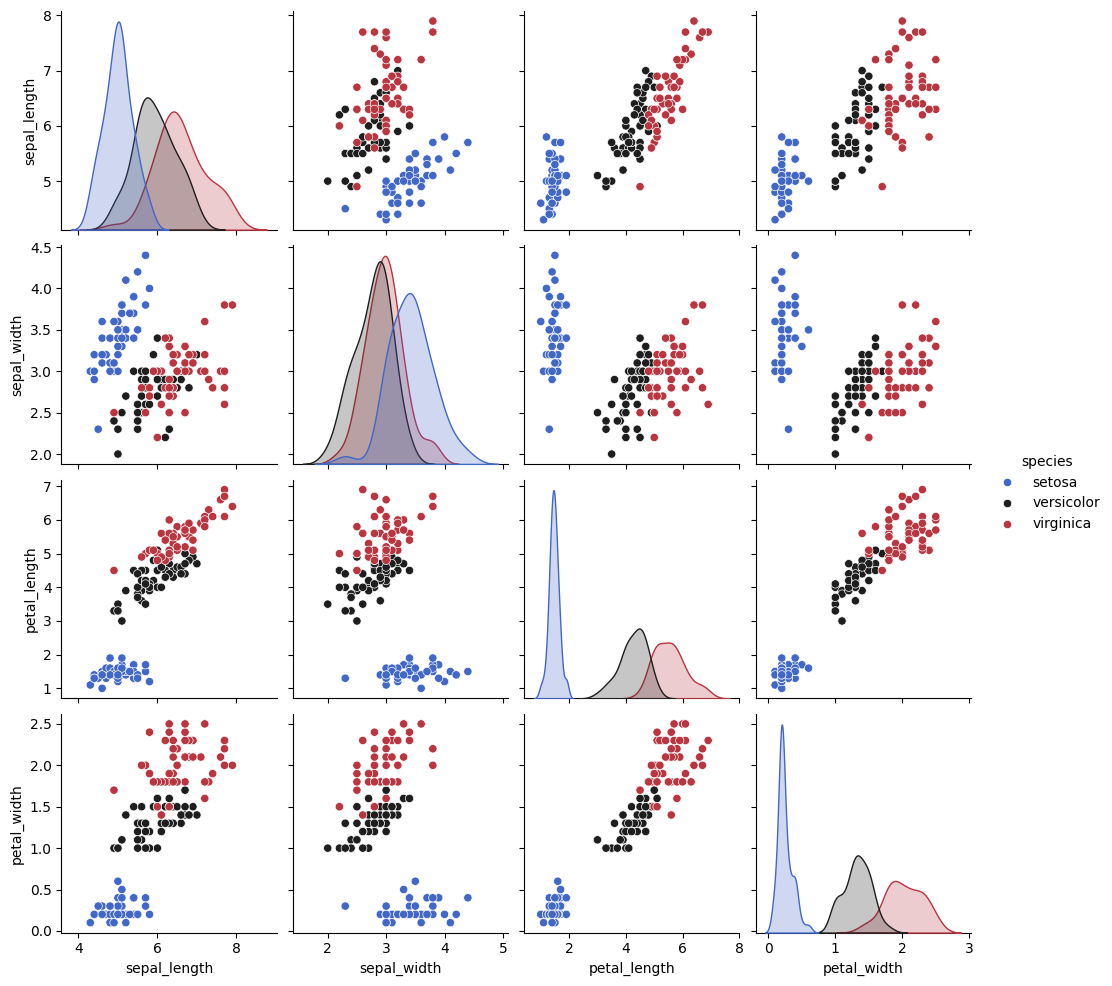

In [4]:
grafico_species = sns.pairplot(data=iris_species, hue='species', palette='icefire')

### Comentário:

> Por conhecer os dados que estamos trabalhando, já imaginava o grupo que se destaca  
> dos outros é a **Setosa**, devido às suas características.

> Decidi plotar o gráfico com o parâmetro `hue` em **Species** para melhorar a visualização.  
> Sem o `hue` em **Species**, é impossível dividir o grupo das **Versicolor** e **Virginica**  
> apenas observando o gráfico, pois as características de **sepal_width** e **sepal_length**  
> são semelhantes. As outras medidas apresentam um leve cruzamento, o que também não  
> permite visualizar uma separação clara.

> Em uma análise rápida e equivocada, provavelmente definiríamos **2 clusters**.  
> Visualizando dessa forma, podemos definir **3 clusters**, dá para perceber que algumas  
> **Versicolor** poderão ficar no grupo das **Virginica**, e o oposto também pode acontecer  
> dependendo do resultado do nosso modelo.
---


## 2\. Dados 

In [5]:
iris = iris.drop(columns='species', axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> Dropei a coluna espécies porque não precisamos dela quando utilizamos o KMeans.
___

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


> Não encontramos nenhum valor nulo.
___

### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

In [7]:
iris_normalized = pd.DataFrame({
    f'{col}_std': iris[col].apply(lambda x: (x - iris[col].mean()) / iris[col].std())
    for col in iris.columns
})

### Explicação do Processo de Normalização

- **Novo DataFrame**:  
  Criei um novo DataFrame chamado `iris_normalized` a partir do DataFrame original `iris`.

- **Função Lambda**:  
  Utilizei uma função `lambda` para normalizar os valores de cada coluna, calculando a média da coluna menos o valor de cada linha, dividido pelo desvio padrão da coluna.

- **Loop no Dicionário**:  
  Usei um `for` para aplicar a normalização em todas as colunas do DataFrame de forma dinâmica.

- **Vantagens do Processo**:
  1. Evita a necessidade de criar novas colunas no DataFrame original.
  2. Elimina o trabalho de remover (dropar) as colunas antigas que não possuem o sufixo `_std`.
---

### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [8]:
iris_normalized.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


> O processo que utilizei não necessita fazer limpeza do Dataframe.
___

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

## 3\. Modelagem 

In [9]:
wcss = list()

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(iris_normalized)
    wcss.append(kmeans.inertia_)

print(wcss)

[596.0000000000001, 220.87929359858953, 138.88835971735142, 113.64981140683449, 104.37882881529613, 81.9726235655554, 72.28549426172765, 62.16912522305672, 59.29899445088311, 54.418753454777786]


> Defini o `random_state=123` para garantir que as centróides sejam as mesmas em cada execução do nosso loop for.  
> O `KMeans` defini centróides aleatórias podendo gerar resultados ligeiramente diferentes,  
> nesse caso não afeta nosso resultado mas[...]
___

### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

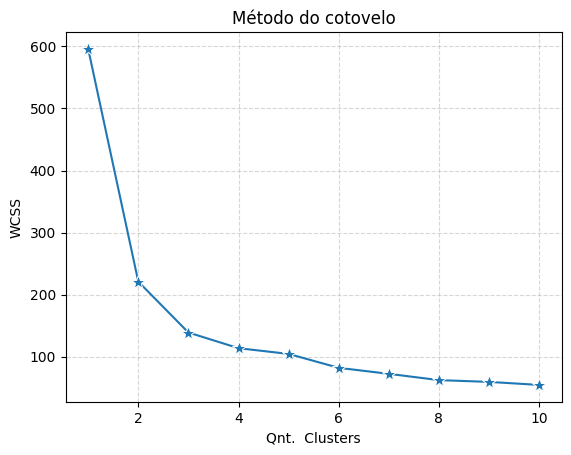

In [10]:
grafico_linha = sns.lineplot(x=range(1, 11), y=wcss, marker='*', markersize=10)
grafico_linha.set(title='Método do cotovelo', xlabel='Qnt.  Clusters', ylabel='WCSS')
grafico_linha.grid(axis='both', linestyle='--', alpha=0.5)

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [11]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(iris_normalized)

iris['cluster'] = kmeans.labels_
iris_normalized['cluster'] = kmeans.labels_
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

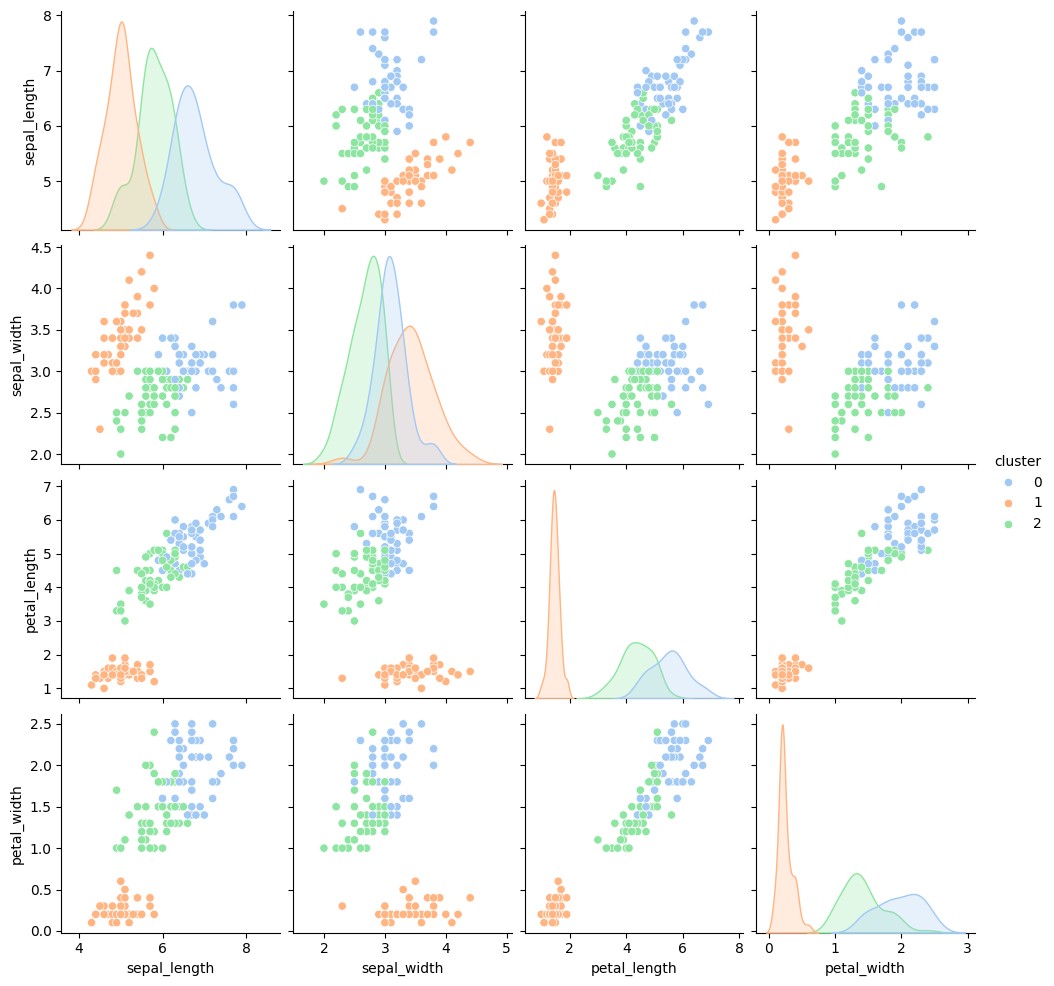

In [12]:
grafico_cluster = sns.pairplot(data=iris, hue='cluster', palette='pastel')

**Comentário:** 

> Como esperava dividindo os dados em 3 clusters ficou algo muito proximo da separação por `species`   
> mas aconteceu o que já tinha presvisto na primeira visualização dos gráficos, "dá para perceber que algumas  
> **Versicolor** poderão ficar no grupo das **Virginica**, e o oposto também pode acontecer."  

> Logo abaixo plotei 2 gráficos **Species** e **Clusters**, podemos entender melhor o que aconteceu.  
> O modelo de agrupamento com base nos centróides fez um trabalho excelente separando os grupos  
> Analisando o ideal seria usar um modelo de classificação para separar esses tipos de dados.

In [13]:
clusters_centers = kmeans.cluster_centers_
clusters_centers = pd.DataFrame(clusters_centers, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

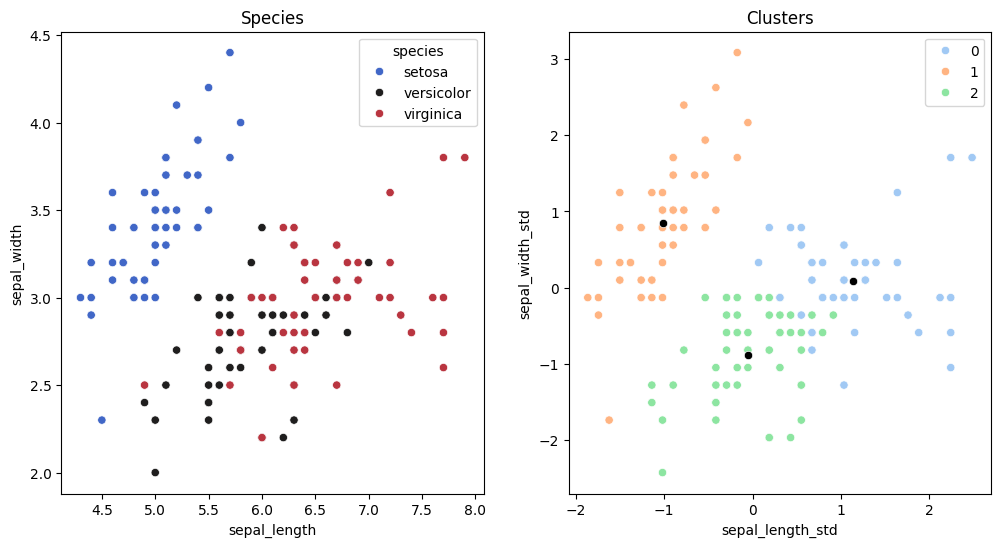

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
sns.scatterplot(data=iris_species, x='sepal_length', y='sepal_width', hue='species',palette='icefire', ax=ax1)
sns.scatterplot(data=iris_normalized, x='sepal_length_std', y='sepal_width_std', hue='cluster', palette='pastel', ax=ax2)
sns.scatterplot(data=clusters_centers, x='sepal_length', y='sepal_width', color='black', ax=ax2)
ax1.set_title('Species')
ax2.set_title('Clusters')
fig.align_titles()

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

In [17]:
nova_flor = [
    (5.1 - iris['sepal_length'].mean()) / iris['sepal_length'].std(), 
    (3.5 - iris['sepal_width'].mean()) / iris['sepal_width'].std(), 
    (1.4 - iris['petal_length'].mean()) / iris['petal_length'].std(), 
    (0.2 - iris['petal_width'].mean()) / iris['petal_width'].std(),
    ]

nova_flor = np.array(nova_flor)
print(nova_flor)

[-0.89767388  1.01560199 -1.33575163 -1.31105215]


**Obs.** Como estamos fazendo apenas um teste normalizei os valores em 4 linhas para evitar criar 8 variáveis novas, mais 8 linhas...  
se fosse fazer mais testes teria atribuido os valores de `mean()` e `std()` a novas variávies.

In [16]:
cluster = kmeans.predict(nova_flor.reshape(1, -1))
print(f'A nova flor pertence ao grupo das flores do Cluster: {list(cluster)[0]}')

A nova flor pertence ao grupo das flores do Cluster: 1


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---